In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [17]:
import matplotlib

print('설정 파일 위치 : ', matplotlib.matplotlib_fname())
print('기본 설정 폰트 : ', plt.rcParams['font.family'])
print('기본 설정 사이즈 : ', plt.rcParams['font.size'])

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False

설정 파일 위치 :  c:\anaconda\lib\site-packages\matplotlib\mpl-data\matplotlibrc
기본 설정 폰트 :  ['sans-serif']
기본 설정 사이즈 :  10.0


In [38]:
monthly_charge_2020 = pd.read_csv('monthly_charge_2020.csv', index_col=0, encoding='cp949')
monthly_charge_2021 = pd.read_csv('monthly_charge_2021.csv', index_col=0, encoding='cp949')

monthly_charge = pd.concat([monthly_charge_2020, monthly_charge_2021])

In [40]:
date_index = pd.date_range(start='2020-01-01', periods=len(monthly_charge), freq='MS')
monthly_charge.index = date_index
monthly_charge

,월,광산구,남구,동구,북구,서구
2020-01-01,1,33858.7480,10002.040,10188.62000,60180.1700,57015.3900
2020-02-01,2,27679.3220,8859.740,8290.67000,55596.2300,52196.1560
2020-03-01,3,30470.5600,8409.330,9245.30000,48137.7700,47398.3240
2020-04-01,4,33526.2320,8769.490,9157.15000,52862.1900,51840.7000
2020-05-01,5,32933.3140,9270.690,9233.28000,50325.2000,56475.7700
2020-06-01,6,30262.7080,8676.860,9470.55000,35360.0100,38701.4760
2020-07-01,7,33434.0540,8357.870,9611.50000,71741.9300,50329.2820
2020-08-01,8,36713.8360,9453.400,11165.87000,33874.4600,55512.3560
2020-09-01,9,31952.0300,8598.930,9993.77000,50573.4400,45393.9430
2020-10-01,10,35723.1940,10219.070,11197.66000,96003.9000,51124.4109


In [25]:
# monthly_charge.to_csv('2년구별총충전량.csv', encoding='cp949')

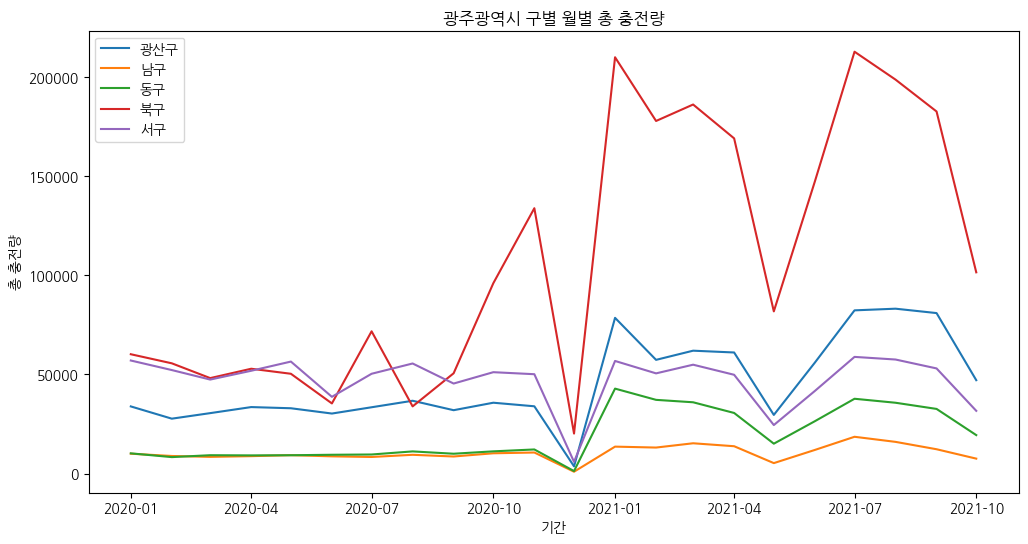

In [37]:
import matplotlib.pyplot as plt

# 데이터 시각화 준비
plt.figure(figsize=(12, 6))

# 각 구별로 월별 총 충전량 시각화
for column in monthly_charge.columns:
    if column != '년' and column != '월':
        plt.plot(monthly_charge.index, monthly_charge[column], label=column)

# 축 레이블 및 범례 설정
plt.xlabel('기간')
plt.ylabel('총 충전량')
plt.legend()

# 제목 설정
plt.title('광주광역시 구별 월별 총 충전량')

# 그래프 표시
plt.show()


In [22]:
# 1차 차분
monthly_charge_diff = monthly_charge.diff().dropna()

In [23]:
monthly_charge_diff

,월,광산구,남구,동구,북구,서구
2020-02-01,1.0,-6179.4260,-1142.300,-1897.95000,-4583.9400,-4819.2340
2020-03-01,1.0,2791.2380,-450.410,954.63000,-7458.4600,-4797.8320
2020-04-01,1.0,3055.6720,360.160,-88.15000,4724.4200,4442.3760
2020-05-01,1.0,-592.9180,501.200,76.13000,-2536.9900,4635.0700
2020-06-01,1.0,-2670.6060,-593.830,237.27000,-14965.1900,-17774.2940
2020-07-01,1.0,3171.3460,-318.990,140.95000,36381.9200,11627.8060
2020-08-01,1.0,3279.7820,1095.530,1554.37000,-37867.4700,5183.0740
2020-09-01,1.0,-4761.8060,-854.470,-1172.10000,16698.9800,-10118.4130
2020-10-01,1.0,3771.1640,1620.140,1203.89000,45430.4600,5730.4679
2020-11-01,1.0,-1799.8240,389.610,952.71000,37826.3199,-1019.9799


In [17]:
# 1차 차분 수행
diff_data = monthly_charge.diff().dropna()

# ADF 테스트
result = adfuller(diff_data['광산구'])
print(f"ADF 통계량: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

# ADF 통계량 값이 -4.067으로 1% 유의수준에서 임계값인 -3.924보다 작으므로 귀무가설을 기각하고 대립가설을 채택할 수 있습니다.
# 즉, 차분한 데이터는 정상성을 가지고 있다고 할 수 있습니다.
# 또한, p-value가 0.0011로 매우 작으므로 이 결과가 우연에 의한 것이라고 할 확률이 매우 작습니다.

ADF 통계량: -4.066871738674207
p-value: 0.001098115092623161
Critical Values:
	1%: -3.9240193847656246
	5%: -3.0684982031250003
	10%: -2.67389265625


c:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


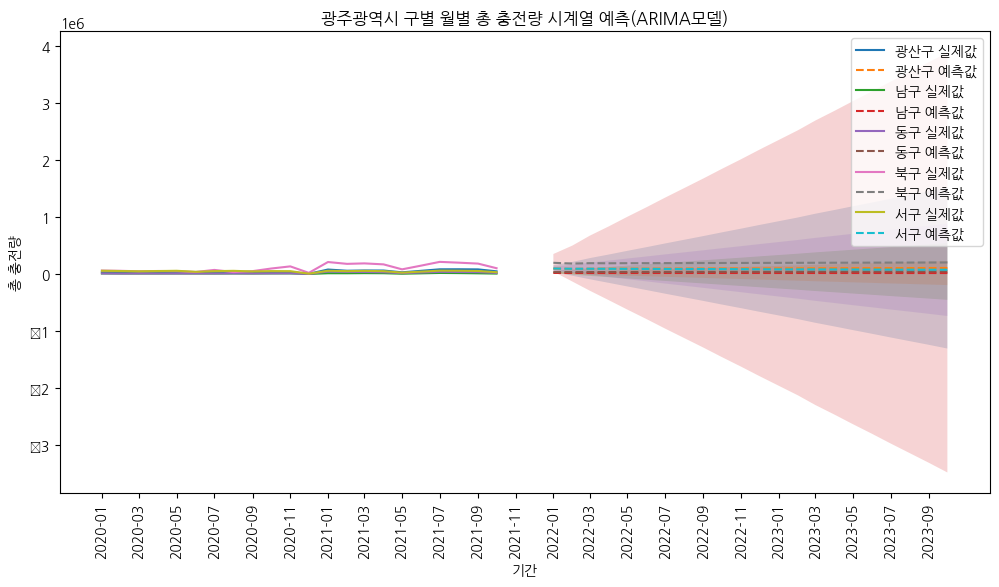

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 데이터 불러오기
monthly_charge = pd.read_csv('2년구별총충전량.csv', index_col=0, encoding='cp949')

# 인덱스를 날짜로 설정
date_index = pd.date_range(start='2020-01-01', periods=len(monthly_charge), freq='MS')
monthly_charge.index = date_index

# 구 리스트
districts = ['광산구', '남구', '동구', '북구', '서구']

# 차분 데이터 생성
diff_monthly_charge = monthly_charge.diff().dropna()
diff_monthly_charge.columns = [f'{col} (diff)' for col in diff_monthly_charge.columns]

# 예측 기간 설정
start_date = '2022-01-01'
end_date = '2023-10-01'
forecast_steps = 22

# X축 레이블 조정
xticks_dates = pd.date_range(start='2020-01-01', end=end_date, freq='MS')
xticks_labels = [f"{x.year}-{x.month:02d}" for x in xticks_dates]

# 시각화 준비
plt.figure(figsize=(12, 6))

# 각 구별로 ARIMA 모델로 월별 총 충전량 시계열 예측
for district in districts:
    train_data = diff_monthly_charge.loc[:'2021-10', [f'{district} (diff)']]

    # ARIMA 모델 훈련
    arima_model = ARIMA(train_data, order=(1,1,1))
    arima_result = arima_model.fit()

# 예측
    forecast = arima_result.get_forecast(steps=forecast_steps, alpha=0.1)
    forecast_conf_int = forecast.conf_int()

# 예측 기간 날짜 생성
    forecast_dates = pd.date_range(start=start_date, periods=forecast_steps, freq='MS')

# 예측 결과에 누적합을 취해 원본 데이터의 스케일로 변환
    predicted = forecast.predicted_mean.cumsum() + monthly_charge[district][0]
    lower = forecast_conf_int[f'lower {district} (diff)'].cumsum() + monthly_charge[district][0]
    upper = forecast_conf_int[f'upper {district} (diff)'].cumsum() + monthly_charge[district][0]

# 시각화
    plt.plot(monthly_charge.index, monthly_charge[district], label=f'{district} 실제값')
    plt.plot(forecast_dates, predicted.values + monthly_charge[district][-1], label=f'{district} 예측값', linestyle='--')
    plt.fill_between(forecast_dates, lower.values + monthly_charge[district][-1], upper.values + monthly_charge[district][-1], alpha=0.2)

plt.xticks(xticks_dates[::2], xticks_labels[::2], rotation=90)

plt.title('광주광역시 구별 월별 총 충전량 시계열 예측(ARIMA모델)')
plt.xlabel('기간')
plt.ylabel('총 충전량')
plt.legend()
plt.show()

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 각 구별로 RMSE 계산
for district in districts:
    train_data = diff_monthly_charge.loc[:'2021-10', [f'{district} (diff)']]

    # ARIMA 모델 훈련
    arima_model = ARIMA(train_data, order=(1, 1, 1))
    arima_result = arima_model.fit()

    # 예측
    forecast = arima_result.get_forecast(steps=forecast_steps, alpha=0.1)

    # 실제값과 예측값
    actual_values = diff_monthly_charge.loc['2021-01':'2021-10', [f'{district} (diff)']].values.ravel()
    predicted_values = forecast.predicted_mean.values[:10]  # 2021년 1월부터 10월까지의 예측값

    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
    print(f'{district} RMSE: {rmse}')


광산구 RMSE: 27417.168293476443
남구 RMSE: 5843.246231573787
동구 RMSE: 14783.120873798267
북구 RMSE: 69395.35893197508
서구 RMSE: 18985.921091167722


c:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


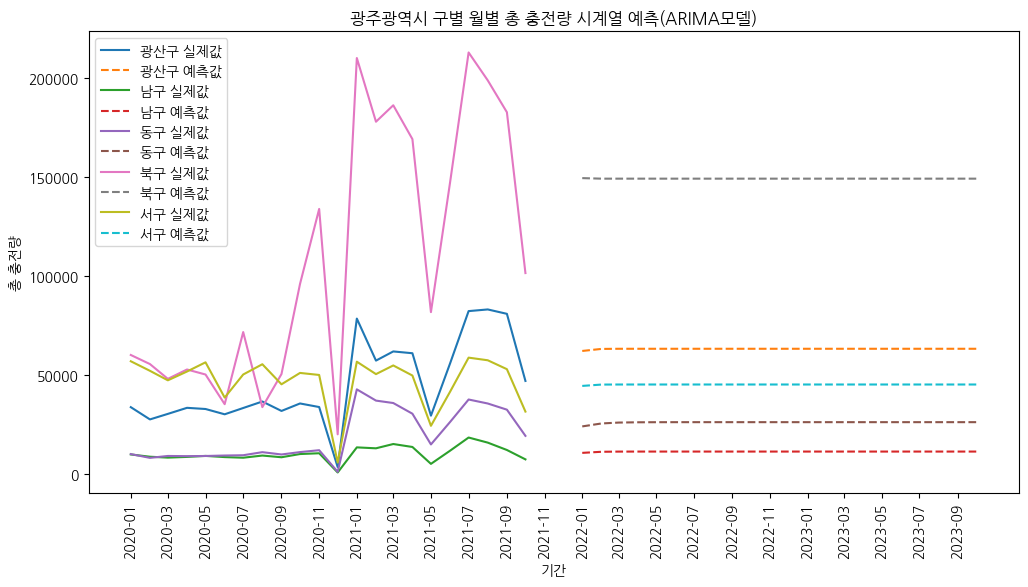

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 데이터 불러오기
monthly_charge = pd.read_csv('2년구별총충전량.csv', index_col=0, encoding='cp949')

# 인덱스를 날짜로 설정
date_index = pd.date_range(start='2020-01-01', periods=len(monthly_charge), freq='MS')
monthly_charge.index = date_index

# 구 리스트
districts = ['광산구', '남구', '동구', '북구', '서구']

# 예측 기간 설정
start_date = '2022-01-01'
end_date = '2023-10-01'
forecast_steps = 22

# X축 레이블 조정
xticks_dates = pd.date_range(start='2020-01-01', end=end_date, freq='MS')
xticks_labels = [f"{x.year}-{x.month:02d}" for x in xticks_dates]

# 시각화 준비
plt.figure(figsize=(12, 6))

# 각 구별로 ARIMA 모델로 월별 총 충전량 시계열 예측
for district in districts:
    train_data = monthly_charge.loc[:'2021-10', [district]]

    # ARIMA 모델 훈련
    arima_model = ARIMA(train_data, order=(1,1,1))
    arima_result = arima_model.fit()

    # 예측
    forecast = arima_result.get_forecast(steps=forecast_steps)
    forecast_conf_int = forecast.conf_int()

    # 예측 기간 날짜 생성
    forecast_dates = pd.date_range(start=start_date, periods=forecast_steps, freq='MS')

    # 시각화
    plt.plot(monthly_charge.index, monthly_charge[district], label=f'{district} 실제값')
    plt.plot(forecast_dates, forecast.predicted_mean.values, label=f'{district} 예측값', linestyle='--')

plt.xticks(xticks_dates[::2], xticks_labels[::2], rotation=90)

plt.title('광주광역시 구별 월별 총 충전량 시계열 예측(ARIMA모델)')
plt.xlabel('기간')
plt.ylabel('총 충전량')
plt.legend()
plt.show()

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 각 구별로 RMSE 계산
for district in districts:
    train_data = monthly_charge.loc[:'2021-10', [district]]

    # ARIMA 모델 훈련
    arima_model = ARIMA(train_data, order=(1, 1, 1))
    arima_result = arima_model.fit()

    # 예측
    forecast = arima_result.get_forecast(steps=forecast_steps)

    # 실제값과 예측값
    actual_values = monthly_charge.loc['2021-01':'2021-10', [district]].values
    predicted_values = forecast.predicted_mean.values[:10]  # 2021년 1월부터 10월까지의 예측값

    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
    print(f'{district} RMSE: {rmse}')
    
# 1차차분한걸로예측한rmse
# 광산구 RMSE: 27417.168293476443
# 남구 RMSE: 5843.246231573787
# 동구 RMSE: 14783.120873798267
# 북구 RMSE: 69395.35893197508
# 서구 RMSE: 18985.921091167722

광산구 RMSE: 16818.86092845412
남구 RMSE: 3949.1635318812964
동구 RMSE: 10150.740471724228
북구 RMSE: 45493.840260426965
서구 RMSE: 11473.050895399143


In [11]:
# statsmodels 라이브러리설치
# !pip install statsmodels

In [31]:

gwangsan_charge

,광산구
월,
2020-01-01,33858.7480
2020-02-01,27679.3220
2020-03-01,30470.5600
2020-04-01,33526.2320
2020-05-01,32933.3140
2020-06-01,30262.7080
2020-07-01,33434.0540
2020-08-01,36713.8360
2020-09-01,31952.0300


In [30]:
# ARIMA모델 구성 요소 선정 및 최적의 파라미터 탐색 과정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 데이터프레임 생성
data = {'월': pd.date_range(start='2020-01-01', end='2021-10-01', freq='MS'),
        '광산구': [33858.7480, 27679.3220, 30470.5600, 33526.2320, 32933.3140, 30262.7080, 33434.0540, 36713.8360, 31952.0300, 35723.1940, 33923.3700, 3626.3220, 78534.2958, 57345.3260, 61967.6272, 61060.8065, 29575.8884, 55943.6985, 82311.5086, 83149.7335, 80935.2428, 47088.8510]}
gwangsan_charge = pd.DataFrame(data)
gwangsan_charge.set_index('월', inplace=True)

# ADF 테스트
result = adfuller(gwangsan_charge['광산구'])
print(f"ADF 통계량: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

# 그냥 ADF테스트했을때 와 1차차분했을때의 값비교하기
# ADF 통계량: -4.066871738674207
# p-value: 0.001098115092623161
# Critical Values:
# 	1%: -3.9240193847656246
# 	5%: -3.0684982031250003
# 	10%: -2.67389265625

# ADF 통계량: 이 값은 ADF 검정의 통계량입니다. 
# 이 값이 작을수록(음수일 때) 시계열 데이터가 정상성을 가지고 있다고 볼수있다.
# p-value: ADF 검정의 p-value의 값이 작은경우(예: 0.05 미만) 시계열 데이터가 정상성을 가지고 있다고 볼 수 있다.
# 반면, p-value의 값이 큰경우(예: 0.05 이상) 시계열 데이터가 비정상성을 나타낼 수 있다.
# 1차 차분했을때 ADF 통계량 값이 1% -4.067로 1% 유의수준의 -3.924보다 작으므로 정상성을 가지고 있다고 볼 수 있다.

ADF 통계량: 2.4386374759641813
p-value: 0.9990273481139751
Critical Values:
	1%: -4.137829282407408
	5%: -3.1549724074074077
	10%: -2.7144769444444443


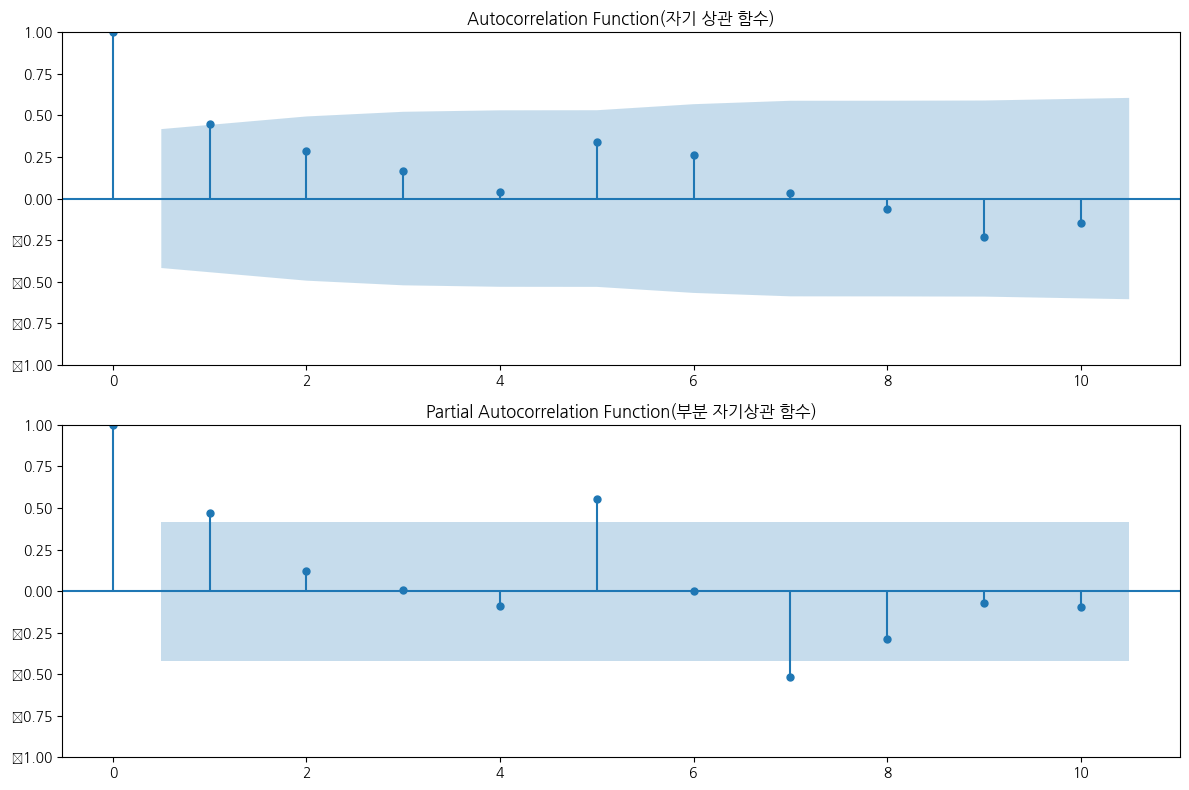

In [7]:
# ACF와 PACF플롯을 사용하여 p와 q값 추정
# ACF 및 PACF 플롯 그리기
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF 플롯 lags수를 10개월로 수정
plot_acf(monthly_charge['광산구'], ax=axes[0], lags=10)
axes[0].set_title('Autocorrelation Function(자기 상관 함수)')

# PACF 플롯
plot_pacf(monthly_charge['광산구'], ax=axes[1], lags=10)
axes[1].set_title('Partial Autocorrelation Function(부분 자기상관 함수)')

plt.tight_layout()
plt.show()

# ACF 및 PACF플롯을 통해 p와 q의 초기 추정치결정하고, 
# ACF플롯에서 절단점이 발생하는 시차를 q로,
# PACF플롯에서 절단점이 발생하는 시차를 p로 선택

c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


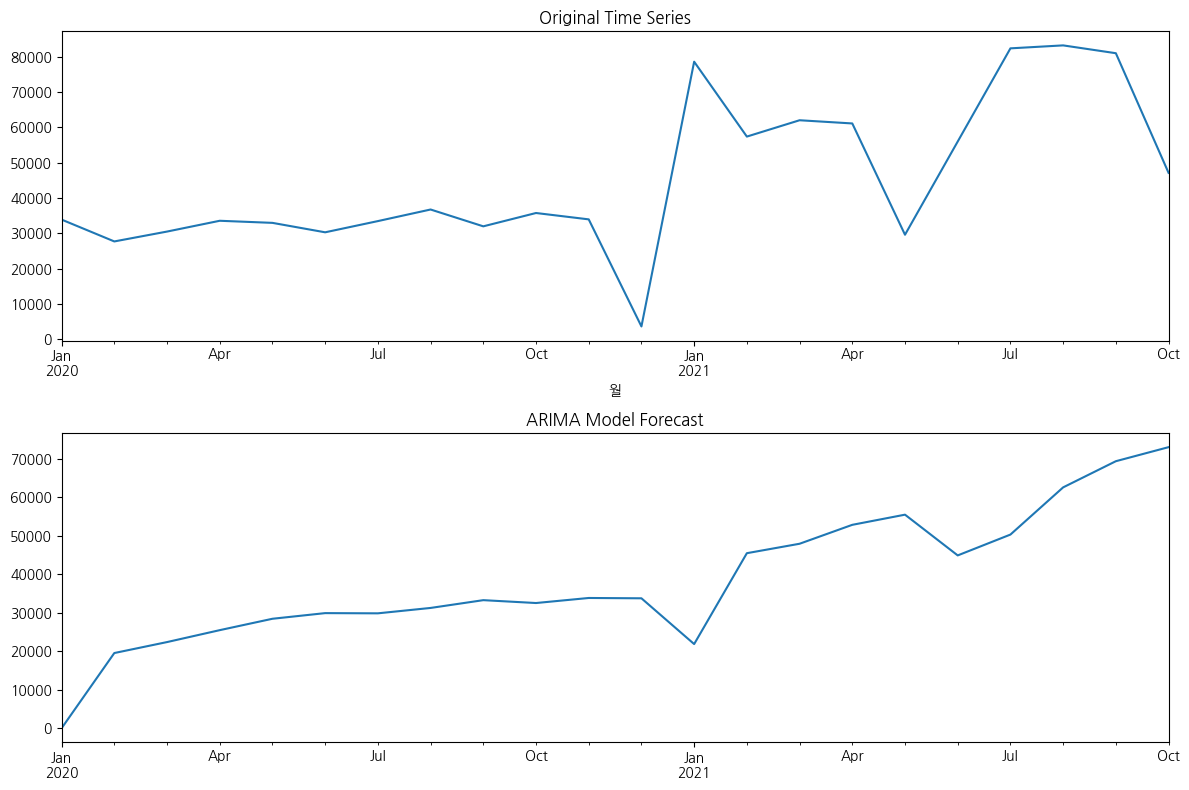

In [8]:
from statsmodels.tsa.arima.model import ARIMA
# p: 자기회귀(AR)의 차수. 이전 시점의 데이터가 현재 시점의 데이터에 영향을 미치는 정도
# d: 차분의 차수. 시계열 데이터를 정상 상태로 만드는 데 필요한 차분의 횟수
# q: 이동평균(MA)의 차수. 예측 오차가 현재 시점의 데이터에 영향을 미치는 정도
# 최적의 p, d, q 파라미터 찾기
best_p = 1  # ACF 및 PACF 플롯을 통해 찾은 최적의 p 값
best_d = 1  # ADF 테스트 결과를 바탕으로 찾은 최적의 d 값
best_q = 1  # ACF 및 PACF 플롯을 통해 찾은 최적의 q 값

# ARIMA 모델 구축 및 피팅
model = ARIMA(monthly_charge['광산구'], order=(best_p, best_d, best_q))
results = model.fit()

# 시계열 분해 및 시각화
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 원본 시계열 데이터
monthly_charge['광산구'].plot(ax=axes[0], title='Original Time Series')

# ARIMA 모델의 예측값
results.predict().plot(ax=axes[1], title='ARIMA Model Forecast')

plt.tight_layout()
plt.show()


c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


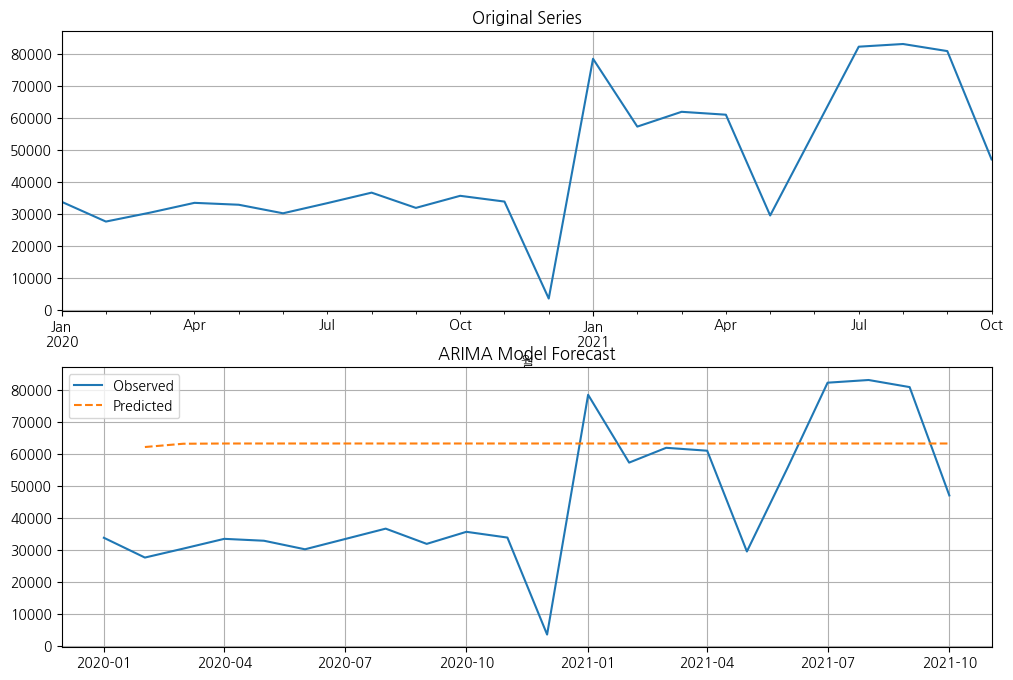

In [10]:
# 모델 학습 및 검증

# ARIMA 모델 구축 및 피팅
model = ARIMA(monthly_charge['광산구'], order=(best_p, best_d, best_q))
results = model.fit()

# 시계열 분해 및 시각화
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 원본 시계열
monthly_charge['광산구'].plot(ax=axes[0], title='Original Series', grid=True)

# ARIMA 모델 예측 결과 시각화
forecast_values = results.forecast(steps=len(monthly_charge['광산구']) - best_d)
axes[1].plot(monthly_charge.index, monthly_charge['광산구'], label='Observed')
axes[1].plot(monthly_charge.index[best_d:], forecast_values, label='Predicted', linestyle='--')
axes[1].set_title('ARIMA Model Forecast')
axes[1].grid(True)
axes[1].legend()

plt.show()